<a href="https://colab.research.google.com/github/2403a52026-lgtm/ML_LAB_Assignment/blob/main/ML_LAB_09_2403a52026_B_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
df = pd.read_csv("heart_disease_uci.csv")  # change filename if needed
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [4]:
df = df.fillna(df.median(numeric_only=True))

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
X = df.drop("num", axis=1)
y = df["num"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
k_values = [3, 5, 7, 11, 15]

results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append([k, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["k", "Accuracy", "Precision", "Recall", "F1"])
results_df

,k,Accuracy,Precision,Recall,F1
0,3,0.608696,0.549393,0.608696,0.570581
1,5,0.576087,0.532390,0.576087,0.550241
2,7,0.608696,0.559448,0.608696,0.576925
3,11,0.592391,0.537946,0.592391,0.560335
4,15,0.586957,0.517917,0.586957,0.546239


In [13]:
for k in k_values:
    print(f"\n===== k = {k} =====")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred))


===== k = 3 =====
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        82
           1       0.55      0.77      0.64        53
           2       0.11      0.05      0.06        22
           3       0.29      0.19      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.61       184
   macro avg       0.34      0.36      0.34       184
weighted avg       0.55      0.61      0.57       184


===== k = 5 =====
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.51      0.68      0.59        53
           2       0.18      0.14      0.15        22
           3       0.08      0.05      0.06        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.31      0.33      0.32       184
weighted avg       0.53      0.58      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

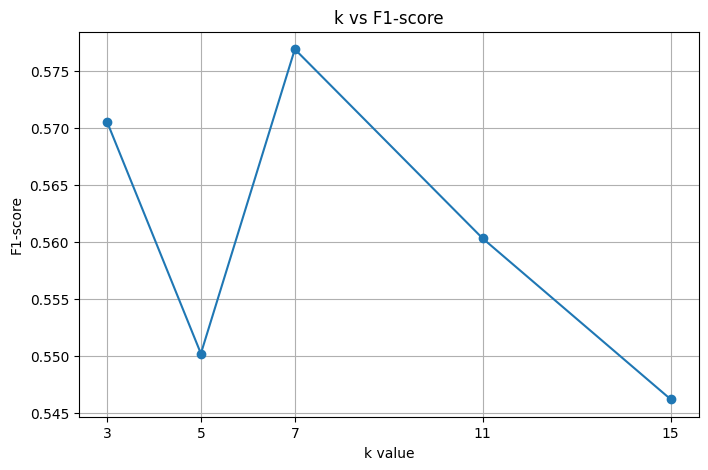

In [14]:
plt.figure(figsize=(8,5))
plt.plot(results_df["k"], results_df["F1"], marker='o')
plt.title("k vs F1-score")
plt.xlabel("k value")
plt.ylabel("F1-score")
plt.xticks(k_values)
plt.grid()
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

y_pred = knn_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.7643478260869566
